In [1]:
%matplotlib qt
import mne
import os
import sys
print('Python v{}'.format(sys.version))
print('MNE v{}'.format(mne.__version__))

Python v3.6.8 |Anaconda, Inc.| (default, Dec 30 2018, 01:22:34) 
[GCC 7.3.0]
MNE v0.19.0


In [2]:
raw_fname = ('raw_fif/')             # define raw file name
#subjectlist = ['sub-11','sub-28']  # get each subject name
os.makedirs('epochs_fif/')

In [5]:
montage = mne.channels.read_montage('standard_1020')#read montage
subj11_name_path = os.path.join(raw_fname, 'sub-11_raw.fif')#Concatenate file name 
df_subj11 = mne.io.read_raw_fif(subj11_name_path, montage, preload=True)
df_subj11.filter(0.5, None, fir_design='firwin')#high pass filter with fir filter
df_subj11.filter(None, 40, fir_design='firwin')#low pass filter  with fir filter

Opening raw data file raw_fif/sub-11_raw.fif...


/media/hcp4715/study/Py_Envs/Py_MNE/lib/python3.6/site-packages/mne/utils/docs.py:824: DeprecationWarning: Function read_montage is deprecated; ``read_montage`` is deprecated and will be removed in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_custom_montage``, or ``read_dig_captrack`` to read a digitization based on your needs instead; or ``make_standard_montage`` to create ``DigMontage`` based on template; or ``make_dig_montage`` to create a ``DigMontage`` out of np.arrays
  warnings.warn(msg, category=DeprecationWarning)
/media/hcp4715/study/Py_Envs/Py_MNE/lib/python3.6/site-packages/mne/utils/docs.py:807: DeprecationWarning: Class Montage is deprecated; Montage class is deprecated and will be removed in v0.20. Please use DigMontage instead.
  warnings.warn(msg, category=DeprecationWarning)


    Range : 0 ... 1434974 =      0.000 ...  2869.948 secs
Ready.
Reading 0 ... 1434974  =      0.000 ...  2869.948 secs...
Filtering raw data in 9 contiguous segments
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Filter length: 3301 samples (6.602 sec)

Filtering raw data in 9 contiguous segments
Setting up low-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter 

<Raw  |  sub-11_raw.fif, n_channels x n_times : 63 x 1434975 (2869.9 sec), ~689.9 MB, data loaded>

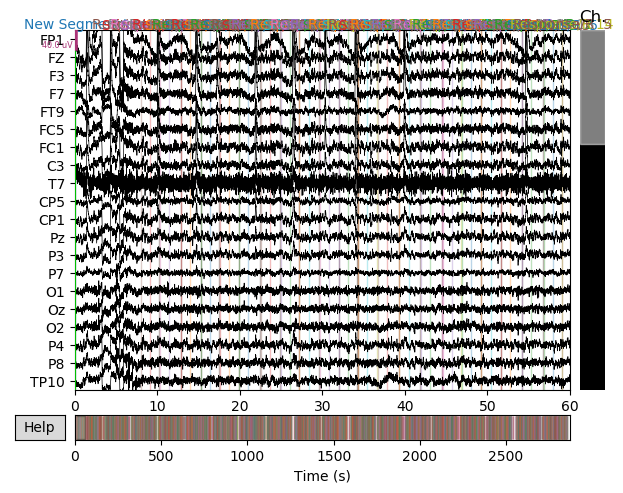

In [8]:
#mag_channels = mne.pick_types(df_subj11.info, meg='mag')
df_subj11.plot(duration=60, remove_dc=False)

In [10]:
import numpy as np
fig = df_subj11.plot_psd(tmax=np.inf, fmax=250, average=True)
# add some arrows at 60 Hz and its harmonics:
for ax in fig.axes[:2]:
    freqs = ax.lines[-1].get_xdata()
    psds = ax.lines[-1].get_ydata()
    for freq in (60, 120, 180, 240):
        idx = np.searchsorted(freqs, freq)
        ax.arrow(x=freqs[idx], y=psds[idx] + 18, dx=0, dy=-12, color='red',
                 width=0.1, head_width=3, length_includes_head=True)

Effective window size : 4.096 (s)


Opening raw data file raw_fif/sub-28_raw.fif...


/media/hcp4715/study/Py_Envs/Py_MNE/lib/python3.6/site-packages/mne/utils/docs.py:824: DeprecationWarning: Function read_montage is deprecated; ``read_montage`` is deprecated and will be removed in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_custom_montage``, or ``read_dig_captrack`` to read a digitization based on your needs instead; or ``make_standard_montage`` to create ``DigMontage`` based on template; or ``make_dig_montage`` to create a ``DigMontage`` out of np.arrays
  warnings.warn(msg, category=DeprecationWarning)
/media/hcp4715/study/Py_Envs/Py_MNE/lib/python3.6/site-packages/mne/utils/docs.py:807: DeprecationWarning: Class Montage is deprecated; Montage class is deprecated and will be removed in v0.20. Please use DigMontage instead.
  warnings.warn(msg, category=DeprecationWarning)


    Range : 0 ... 1492024 =      0.000 ...  2984.048 secs
Ready.
Reading 0 ... 1492024  =      0.000 ...  2984.048 secs...
Filtering raw data in 9 contiguous segments
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Filter length: 3301 samples (6.602 sec)

Filtering raw data in 9 contiguous segments
Setting up low-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter 

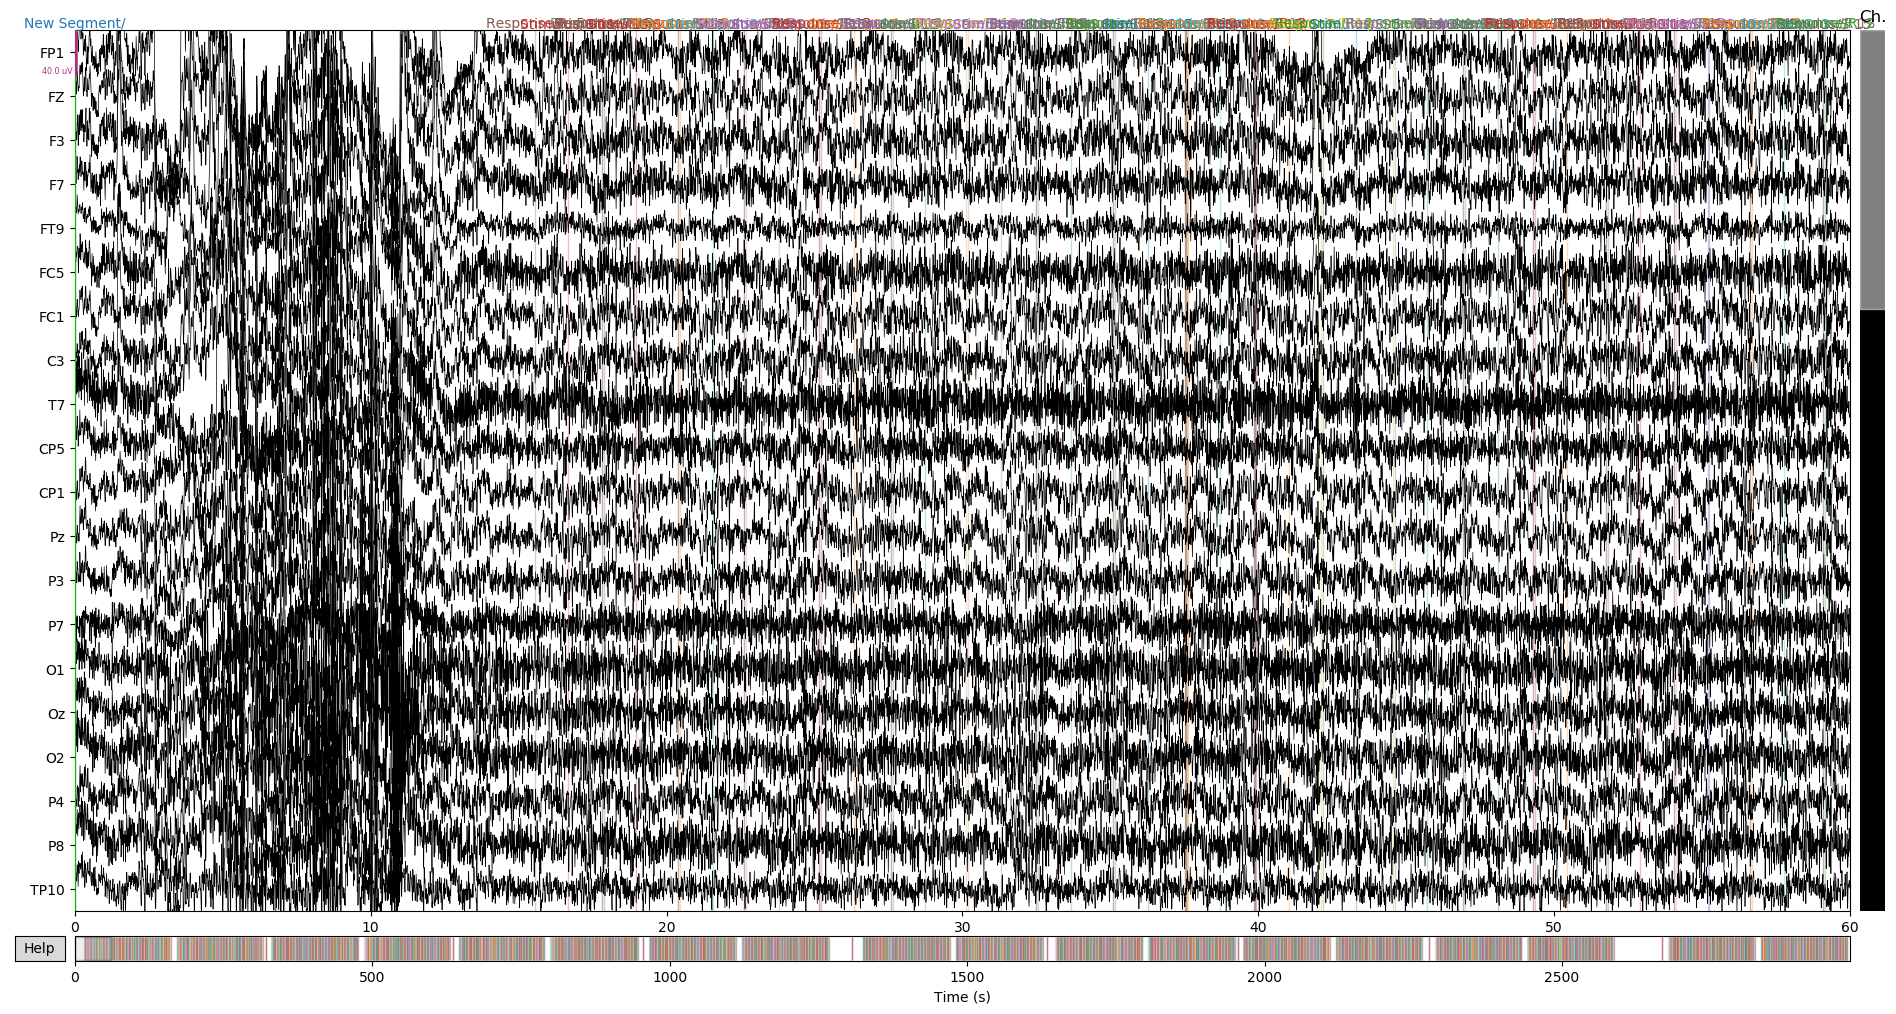

In [15]:
montage = mne.channels.read_montage('standard_1020')#read montage
subj28_name_path = os.path.join(raw_fname, 'sub-28_raw.fif')#Concatenate file name 
df_subj28 = mne.io.read_raw_fif(subj28_name_path, montage, preload=True)
df_subj28.filter(0.5, None, fir_design='firwin')#high pass filter with fir filter
df_subj28.filter(None, 40, fir_design='firwin')#low pass filter  with fir filter
df_subj28.plot(duration=60, remove_dc=False)